# Natural Language Toolkit

* NLTK is a leading platform for building Python programs to work with human language data.

* It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()
import sklearn

import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


import pickle

In [2]:
df = pd.read_csv("spam.csv")
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

# Data Preprocessing
* Data cleaning 
* Exploratory data analysis (EDA)
* Text Preprocessing
* Modeling Building
* Model Evaluation
* Improvement
* Website
* Deploy

# 1.Data cleaning 

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# renaming my columns
df.rename(columns={'Category':'target','Message':'text'},inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Converting the target text to numeric values by using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df['target'] = encoder.fit_transform(df['target'])

In [8]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# checking for duplicate values
df.duplicated().sum()

415

In [11]:
# remove duplicate values
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5157, 2)

# Exploratory data analysis (EDA)

In [14]:
# checking the value counts of both ham and spam 
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

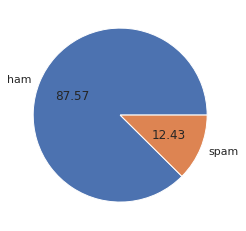

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

<AxesSubplot:>

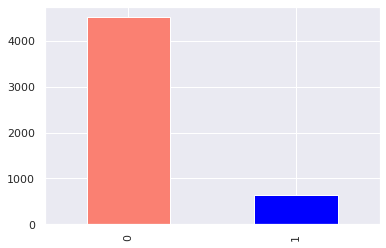

In [16]:
df["target"].value_counts().plot(kind="bar",color=["salmon", "blue"])

# 0-----> ham

# 1-----> spam

In [17]:
# Data is imbalanced
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 110] Connection
[nltk_data]     timed out>


False

In [19]:
#number of characters
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

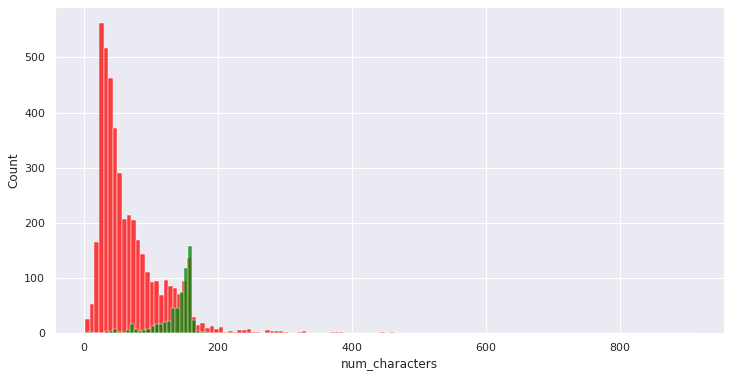

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'],color='red')
sns.histplot(df[df['target']==1]['num_characters'],color='green')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

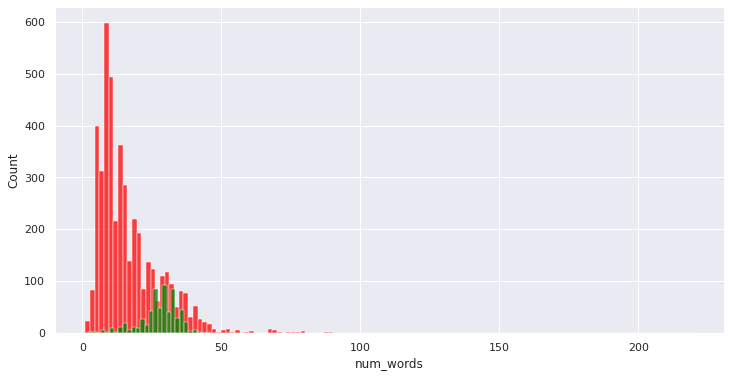

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'],color='red')
sns.histplot(df[df['target']==1]['num_words'],color='green')

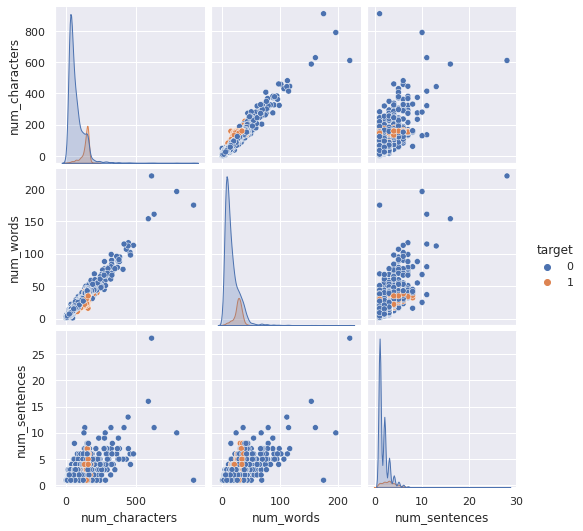

In [30]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

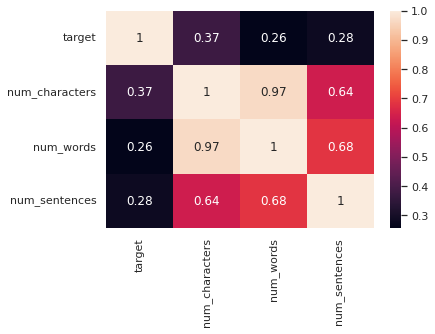

In [31]:
sns.heatmap(df.corr(),annot=True)

# 3.Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* stemming

In [32]:
#Removing stop words
from nltk.corpus import stopwords
#stopwords.words("english")

In [33]:
#punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
#stemming
from nltk.stem.porter import PorterStemmer
ps =  PorterStemmer()
ps.stem('dancing')

'danc'

In [35]:
def transform_text(text):
    text = text.lower() #Lower case
    text = nltk.wordpunct_tokenize(text) #Tokenization
    
    y=[]  #Removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
            
    text = y[:]  #Removing stop words and punctuation
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]  #stemming
    y.clear()
    
    for i in text:
         y.append(ps.stem(i))
            
    return " ".join(y)

In [36]:
# checking the text

In [37]:
df['text'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [38]:
transform_text("Nah I don't think he goes to usf, he lives around here though")

'nah think goe usf live around though'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(df[df['target'] ==1]['transformed_text'].str.cat(sep=" "))

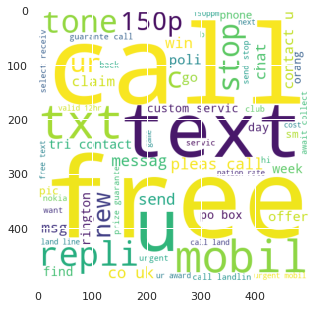

In [43]:
plt.figure(figsize=(7,5))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['target'] ==0]['transformed_text'].str.cat(sep=" "))

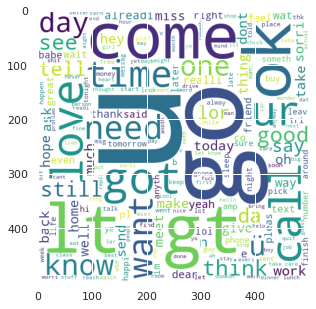

In [45]:
plt.figure(figsize=(7,5))
plt.imshow(spam_wc)

In [46]:
#checking what are the most common words in both spam and ham

In [47]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

11523

/home/ccslab/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


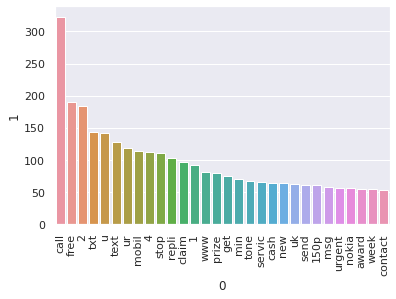

In [49]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

36747

/home/ccslab/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


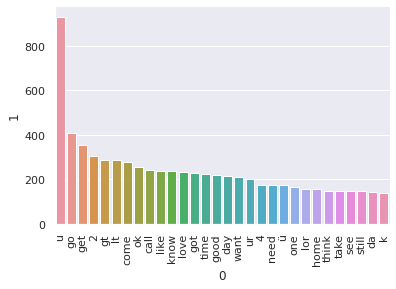

In [52]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
# Text vectorization
# using Bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building 

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [56]:
x.shape

(5157, 7245)

In [57]:
y= df['target'].values

In [58]:
y.shape

(5157,)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874031007751938
[[788 117]
 [ 13 114]]
0.4935064935064935


In [64]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9874031007751938
[[899   6]
 [  7 120]]
0.9523809523809523


In [65]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9757751937984496
[[901   4]
 [ 21 106]]
0.9636363636363636


In [66]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))